In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 18.1 MB/s eta 0:00:0000:01


In [2]:
import os
import shutil 
import random 
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.87 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5845.9/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
model=YOLO('yolov10l.pt')

100%|██████████| 50.0M/50.0M [00:00<00:00, 140MB/s] 


In [5]:
from sklearn.model_selection import train_test_split

# Define paths
base_dir = '/kaggle/input/tmlc-dataset/Annotated_Data for cropping'
output_dir = '/kaggle/working/task1-yolov10'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# the output directories
os.makedirs(os.path.join(train_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'labels'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'labels'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'labels'), exist_ok=True)

# Get all image files
images = [f for f in os.listdir(base_dir) if f.endswith('.JPG')]

# Split the dataset into train, val, test
train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

# Function to move images and labels
def move_files(image_list, destination_dir):
    for image in image_list:
        label = image.replace('.JPG', '.txt')
        shutil.copy(os.path.join(base_dir, image), os.path.join(destination_dir, 'images', image))
        shutil.copy(os.path.join(base_dir, label), os.path.join(destination_dir, 'labels', label))

# Move files
move_files(train_images, train_dir)
move_files(val_images, val_dir)
move_files(test_images, test_dir)

print("Dataset organized successfully!")


Dataset organized successfully!


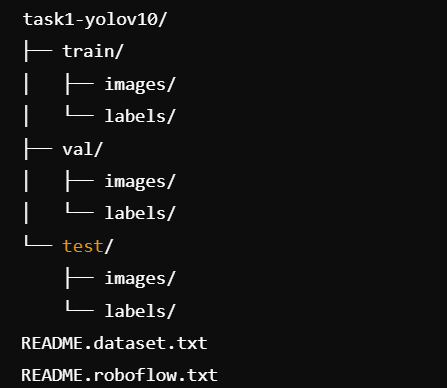

In [6]:
import yaml

# dataset.yaml content
dataset_yaml_content = {
    'train': os.path.join(train_dir, 'images'),
    'val': os.path.join(val_dir, 'images'),
    'test': os.path.join(test_dir, 'images'),
    'nc': 1, 
    'names': ['object'] 
}


yaml_path = os.path.join(output_dir, 'dataset.yaml')

# Save 
with open(yaml_path, 'w') as yaml_file:
    yaml.dump(dataset_yaml_content, yaml_file, default_flow_style=False)

print(f"dataset.yaml created successfully at {yaml_path}")


dataset.yaml created successfully at /kaggle/working/task1-yolov10/dataset.yaml


In [7]:
import torch
torch.cuda.empty_cache()


In [9]:
results = model.train(data='/kaggle/working/task1-yolov10/dataset.yaml', epochs=10, imgsz=320, batch=8)


Ultralytics YOLOv8.2.87 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov10l.pt, data=/kaggle/working/task1-yolov10/dataset.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 17.1MB/s]
2024-09-03 12:07:13,036	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-09-03 12:07:14,113	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1    268800  ultralytics

train: Scanning /kaggle/working/task1-yolov10/train/labels... 179 images, 0 backgrounds, 0 corrupt: 100%|██████████| 179/179 [00:00<00:00, 735.08it/s]

train: New cache created: /kaggle/working/task1-yolov10/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/task1-yolov10/val/labels... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<00:00, 818.67it/s]

val: New cache created: /kaggle/working/task1-yolov10/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.0005), 179 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.9934      4.448      2.091          3        320: 100%|██████████| 23/23 [04:25<00:00, 11.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.76s/it]

                   all         39         39      0.533      0.564      0.589      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.522      2.324      2.464          3        320: 100%|██████████| 23/23 [04:18<00:00, 11.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.60s/it]

                   all         39         39     0.0119      0.974     0.0138    0.00573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G       1.85      1.836      2.692          3        320: 100%|██████████| 23/23 [04:16<00:00, 11.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.76s/it]

                   all         39         39   0.000256     0.0769   0.000145   4.69e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G       1.49      1.466      2.448          3        320: 100%|██████████| 23/23 [04:18<00:00, 11.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.79s/it]

                   all         39         39    0.00537      0.872    0.00577     0.0021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.276       1.14      2.346          3        320: 100%|██████████| 23/23 [04:17<00:00, 11.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.61s/it]

                   all         39         39     0.0505      0.333     0.0308    0.00471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.228      1.141      2.206          3        320: 100%|██████████| 23/23 [04:15<00:00, 11.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.57s/it]

                   all         39         39     0.0604      0.154     0.0239    0.00305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.047     0.8919       2.14          3        320: 100%|██████████| 23/23 [04:16<00:00, 11.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.69s/it]

                   all         39         39      0.326     0.0769      0.047     0.0361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.9793     0.7334      2.084          3        320: 100%|██████████| 23/23 [04:17<00:00, 11.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.45s/it]

                   all         39         39      0.944      0.923      0.969      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.8426     0.6283      2.024          3        320: 100%|██████████| 23/23 [04:15<00:00, 11.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.54s/it]

                   all         39         39      0.895      0.923      0.959      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.8334     0.5369      1.928          3        320: 100%|██████████| 23/23 [04:19<00:00, 11.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.64s/it]

                   all         39         39      0.919      0.974      0.982       0.87



10 epochs completed in 0.794 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
YOLOv10l summary (fused): 461 layers, 25,717,910 parameters, 0 gradients, 126.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.52s/it]


                   all         39         39       0.92      0.974      0.982       0.87
Speed: 0.3ms preprocess, 422.7ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train


In [10]:
# Path 
model_path = '/kaggle/working/runs/detect/train/weights/best.pt'

#  the best model weights
best_model = YOLO(model_path)

In [14]:
images_test = ["/kaggle/working/task1-yolov10/test/images/CN6-3-008_00183.JPG",
               "/kaggle/working/task1-yolov10/test/images/CN5-3-022_00268.JPG",
               "/kaggle/working/task1-yolov10/test/images/CN6-1-010_00194.JPG"]

images = []
for i in range(len(images_test)):
    yolo_outputs = best_model.predict(images_test[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])


image 1/1 /kaggle/working/task1-yolov10/test/images/CN6-3-008_00183.JPG: 320x320 1 object, 516.5ms
Speed: 3.8ms preprocess, 516.5ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 320)
Object 1 is: object
Coordinates are: [218.09616088867188, 123.0263900756836, 3820.5048828125, 3625.147705078125]
Confidence is: 0.98
-------

image 1/1 /kaggle/working/task1-yolov10/test/images/CN5-3-022_00268.JPG: 320x320 1 object, 462.9ms
Speed: 1.8ms preprocess, 462.9ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 320)
Object 1 is: object
Coordinates are: [233.6175537109375, 396.2283020019531, 3705.4326171875, 3782.2177734375]
Confidence is: 0.96
-------

image 1/1 /kaggle/working/task1-yolov10/test/images/CN6-1-010_00194.JPG: 320x320 1 object, 452.6ms
Speed: 1.7ms preprocess, 452.6ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 320)
Object 1 is: object
Coordinates are: [200.38914489746094, 221.3101043701172, 3678.266357421875, 3581.25927734375]
Confidence is

In [15]:
import os
import numpy as np

# the directory containing the test images
test_images_dir = "/kaggle/working/task1-yolov10/test/images"

# the list of all image files in the directory
images_test = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir) if img.endswith('.JPG')]

# Initialize a list to store the output images with detections
images = []

# Loop through each image and run the YOLO model predictions
for image_path in images_test:
    yolo_outputs = best_model.predict(image_path)
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    # Store the image in the 'images' list with detections plotted
    images.append(output.plot()[:, :, ::-1])




image 1/1 /kaggle/working/task1-yolov10/test/images/CN6-3-008_00183.JPG: 320x320 1 object, 469.6ms
Speed: 2.1ms preprocess, 469.6ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 320)
Object 1 is: object
Coordinates are: [218.09616088867188, 123.0263900756836, 3820.5048828125, 3625.147705078125]
Confidence is: 0.98
-------

image 1/1 /kaggle/working/task1-yolov10/test/images/CN5-3-022_00268.JPG: 320x320 1 object, 482.1ms
Speed: 1.8ms preprocess, 482.1ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 320)
Object 1 is: object
Coordinates are: [233.6175537109375, 396.2283020019531, 3705.4326171875, 3782.2177734375]
Confidence is: 0.96
-------

image 1/1 /kaggle/working/task1-yolov10/test/images/CN6-1-010_00194.JPG: 320x320 1 object, 470.3ms
Speed: 5.2ms preprocess, 470.3ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 320)
Object 1 is: object
Coordinates are: [200.38914489746094, 221.3101043701172, 3678.266357421875, 3581.25927734375]
Confidence is

### 3. Detection Results

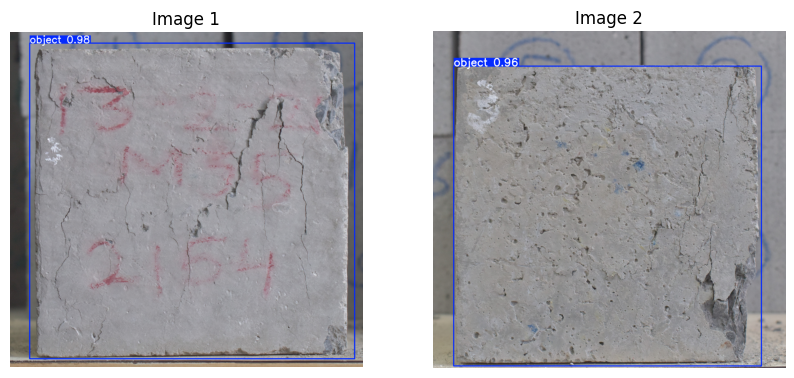

In [18]:
import matplotlib.pyplot as plt

# Number of images to display
num_images_to_display = 2

#  a figure to display images
plt.figure(figsize=(10, 10))

for i in range(num_images_to_display):
    #  a subplot for each image
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"Image {i + 1}")

# Display 
plt.show()


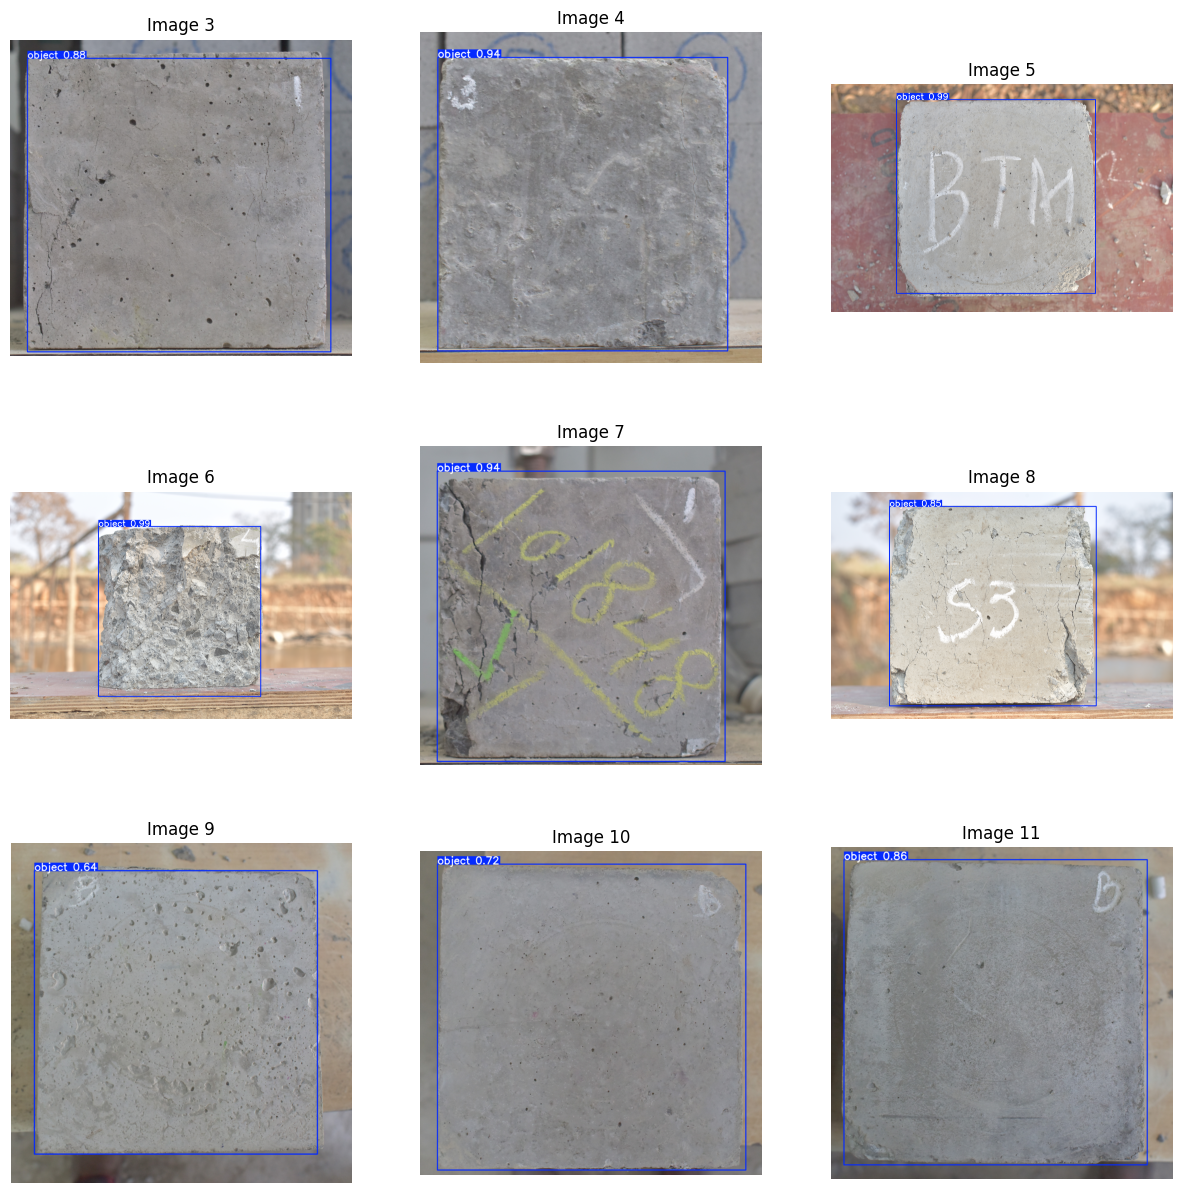

In [19]:
import matplotlib.pyplot as plt

# number of images to display in the grid
num_images_to_display = 9

# a figure with a 3x3 grid
plt.figure(figsize=(15, 15))

for i in range(num_images_to_display):
    #  a subplot for each image in a 3x3 grid
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 2])  # Starting from the 3rd image (index 2)
    plt.axis('off')
    plt.title(f"Image {i + 3}")  # Titles as Image 3 to Image 11

# Display 
plt.show()


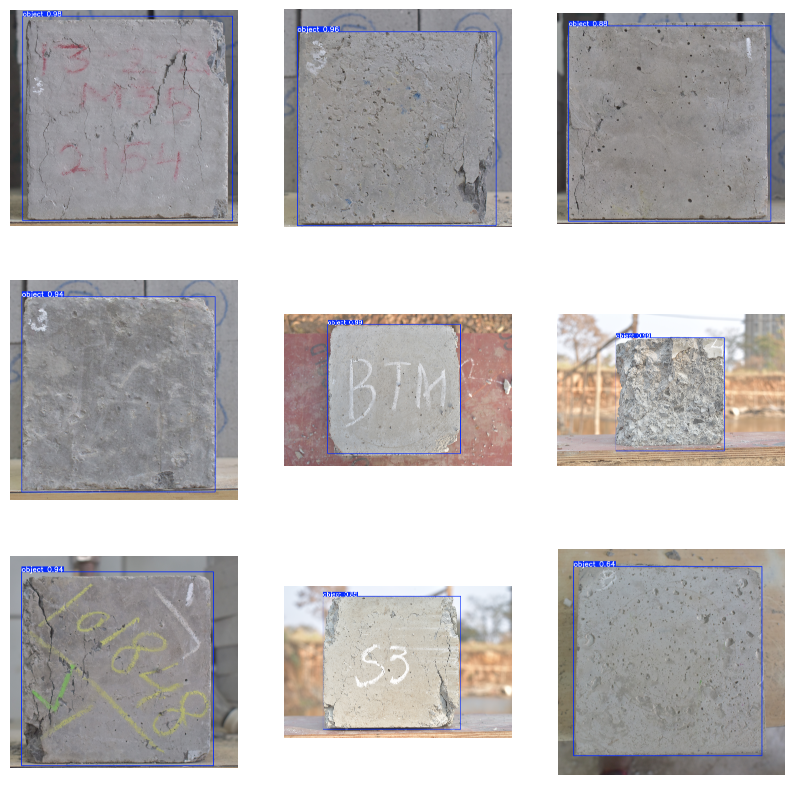

In [22]:
import cv2
import matplotlib.pyplot as plt

# Display the first image with bounding boxes and labels
plt.figure(figsize=(10, 10))
for idx in range(9):
    plt.subplot(3, 3, idx + 1)
    plt.imshow(images[idx])
    plt.axis('off')
plt.show()


### 4. Evaluating mAP

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
